In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv('https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/SPX.csv',
                     index_col='Date', parse_dates=True)

In [58]:
df.head(5)

,Price,Open,High,Low,Change %
Date,,,,,
2017-12-29,"2,673.61","2,689.15","2,692.12","2,673.61",-0.52%
2017-12-28,"2,687.54","2,686.10","2,687.66","2,682.69",0.18%
2017-12-27,"2,682.62","2,682.10","2,685.64","2,678.91",0.08%
2017-12-26,"2,680.50","2,679.09","2,682.74","2,677.96",-0.11%
2017-12-22,"2,683.34","2,684.22","2,685.35","2,678.13",-0.05%


In [59]:
df.columns

Index(['Price', 'Open', 'High', 'Low', 'Change %'], dtype='object')

In [60]:
for col in ['Price', 'Open', 'High', 'Low']:
    df[col] = df[col].str.replace(",","")
    df[col] = pd.to_numeric(df[col])

In [61]:
df.head(5)

,Price,Open,High,Low,Change %
Date,,,,,
2017-12-29,2673.61,2689.15,2692.12,2673.61,-0.52%
2017-12-28,2687.54,2686.10,2687.66,2682.69,0.18%
2017-12-27,2682.62,2682.10,2685.64,2678.91,0.08%
2017-12-26,2680.50,2679.09,2682.74,2677.96,-0.11%
2017-12-22,2683.34,2684.22,2685.35,2678.13,-0.05%


In [24]:
df.dtypes

Price       float64
Open        float64
High        float64
Low         float64
Change %     object
dtype: object

In [62]:
df["Change %"] = df["Change %"].str.replace("%","")

In [63]:
df["Change %"] = pd.to_numeric(df["Change %"])

In [64]:
df.dtypes

Price       float64
Open        float64
High        float64
Low         float64
Change %    float64
dtype: object

In [65]:
df.head()

,Price,Open,High,Low,Change %
Date,,,,,
2017-12-29,2673.61,2689.15,2692.12,2673.61,-0.52
2017-12-28,2687.54,2686.10,2687.66,2682.69,0.18
2017-12-27,2682.62,2682.10,2685.64,2678.91,0.08
2017-12-26,2680.50,2679.09,2682.74,2677.96,-0.11
2017-12-22,2683.34,2684.22,2685.35,2678.13,-0.05


In [66]:
df.sort_index(inplace=True)

In [68]:
df.head()

,Price,Open,High,Low,Change %
Date,,,,,
2006-01-04,1273.46,1268.80,1275.37,1267.74,0.37
2006-01-05,1273.48,1273.46,1276.91,1270.30,0.00
2006-01-06,1285.45,1273.48,1286.09,1273.48,0.94
2006-01-09,1290.15,1285.45,1290.78,1284.82,0.37
2006-01-10,1289.69,1290.15,1290.15,1283.76,-0.04


<AxesSubplot:xlabel='Date'>

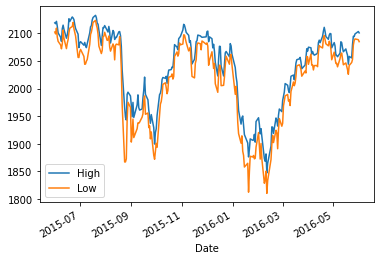

In [69]:
df.query("Date >= '2015-06-01' and Date <= '2016-06-01'")[["High","Low"]].plot()

In [70]:
df.describe()

,Price,Open,High,Low,Change %
count,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000
mean,1576.930597,1576.562337,1585.094839,1567.404445,0.032105
std,450.029412,449.869900,449.078688,450.705886,1.223285
min,676.530000,679.280000,695.270000,666.790000,-9.030000
25%,1266.690000,1266.670000,1274.560000,1259.420000,-0.390000
50%,1428.610000,1428.650000,1437.650000,1422.340000,0.060000
75%,1986.510000,1985.320000,1993.480000,1975.670000,0.540000
max,2690.160000,2692.710000,2694.970000,2685.920000,11.580000


In [81]:
funcs=["min","max","mean"]
df.groupby(pd.Grouper(freq="BM")).agg(funcs)

Price                           Open                        \
                min      max         mean      min      max         mean   
Date                                                                       
2006-01-31  1261.49  1294.18  1279.250000  1261.49  1294.18  1278.653158   
2006-02-28  1254.78  1294.12  1276.645263  1254.78  1294.12  1276.616842   
2006-03-31  1272.23  1307.25  1293.734783  1272.23  1307.25  1293.123913   
2006-04-28  1285.33  1311.56  1302.165263  1285.33  1311.56  1301.777368   
2006-05-31  1256.58  1325.76  1290.013636  1256.56  1325.76  1291.740000   
...             ...      ...          ...      ...      ...          ...   
2017-08-31  2425.55  2480.91  2456.223043  2425.50  2480.38  2456.750000   
2017-09-29  2457.85  2519.36  2492.841000  2462.25  2509.96  2491.332500   
2017-10-31  2529.12  2581.07  2556.997273  2521.20  2578.08  2555.807273   
2017-11-30  2564.62  2647.58  2593.605714  2569.45  2633.93  2590.306190   
2017-12-29  2629.27  2690.16  2664.340500  2626.24  2692.71  2666.070000   

               High                            Low                        \
                min      max         mean      min      max         mean   
Date                                                                       
2006-01-31  1268.19  1294.90  1283.589474  1259.42  1288.12  1274.167368   
2006-02-28  1265.78  1297.57  1281.536316  1253.61  1289.43  1271.135789   
2006-03-31  1278.26  1310.88  1298.765217  1268.42  1305.32  1288.788696   
2006-04-28  1290.93  1318.16  1307.992105  1280.74  1306.59  1296.158421   
2006-05-31  1264.53  1326.70  1297.076818  1245.34  1322.87  1284.194545   
...             ...      ...          ...      ...      ...          ...   
2017-08-31  2430.58  2490.87  2463.660870  2417.35  2475.88  2449.480870   
2017-09-29  2467.11  2519.44  2496.208000  2446.55  2507.99  2486.306500   
2017-10-31  2529.23  2582.98  2560.427727  2520.40  2572.15  2551.009091   
2017-11-30  2572.84  2657.74  2597.430000  2557.45  2633.93  2585.022381   
2017-12-29  2634.41  2694.97  2672.390000  2605.52  2685.92  2658.469000   

           Change %                  
                min   max      mean  
Date                                 
2006-01-31    -1.83  0.94  0.047895  
2006-02-28    -1.04  1.00  0.002632  
2006-03-31    -0.70  1.04  0.049565  
2006-04-28    -1.03  1.71  0.066316  
2006-05-31    -1.68  1.14 -0.138636  
...             ...   ...       ...  
2017-08-31    -1.54  1.00  0.003043  
2017-09-29    -0.76  1.08  0.096000  
2017-10-31    -0.47  0.81  0.099545  
2017-11-30    -0.55  0.98  0.132381  
2017-12-29    -0.52  0.90  0.049000  

[144 rows x 15 columns]

In [72]:
import seaborn as sns

<AxesSubplot:xlabel='Date', ylabel='Change %'>

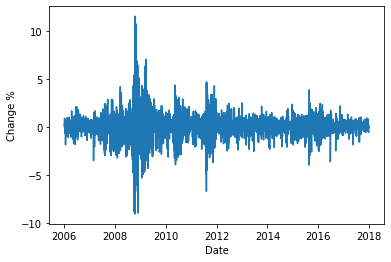

In [73]:
sns.lineplot(data = df["Change %"])

<AxesSubplot:xlabel='Date'>

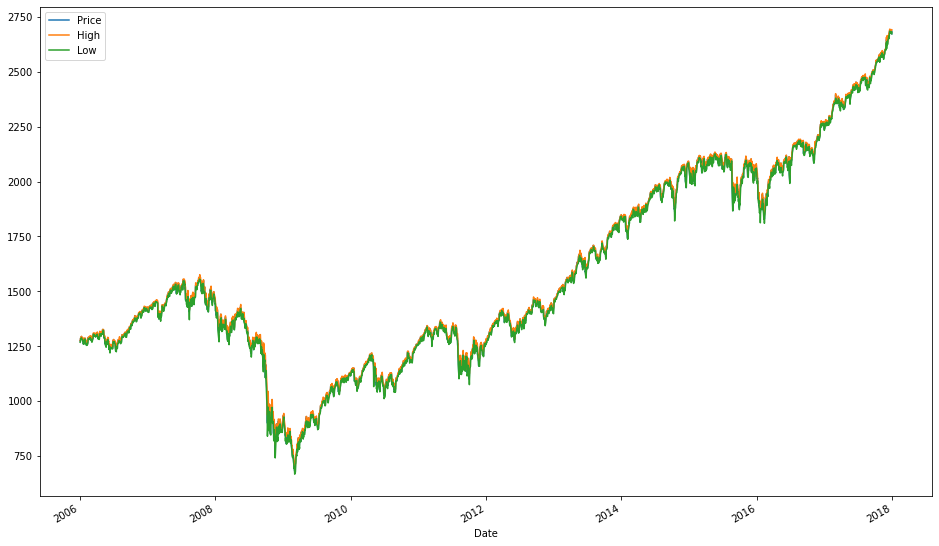

In [80]:
df[["Price","High","Low"]].plot(figsize = (16,10))